<a href="https://colab.research.google.com/github/hadinursalim/EVDA/blob/main/Analisis_sentimen_pada_tweet_Anies_Rasyid_Baswedan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis sentimen pada tweet Anies Rasyid Baswedan**

**KETERANGAN**:
Dalam code ini, saya akan:
* Mengekstrak data twitter menggunakan tweepy dan cara menanganinya menggunakan panda.
* Melakukan beberapa statistik dan visualisasi dasar dengan numpy, matplotlib dan seaborn.
* Melakukan analisis sentimen dari tweet yang diekstraksi (Anies Baswedan) menggunakan textblob.

**1. Mengekstrak data twitter**

1.1 Import library

In [ ]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1.2 Membuat Aplikasi twitter

Untuk mengekstrak tweet untuk analisis posterior, kita perlu mengakses akun Twitter kita dan membuat aplikasi.
Situs web untuk melakukan ini adalah https://apps.twitter.com/

In [ ]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'xxxx'
CONSUMER_SECRET = 'xxxx'

# Access:
ACCESS_TOKEN  = 'xxxx'
ACCESS_SECRET = 'xxxx'

In [ ]:
!pip install credentials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

1.3 Ekstraksi Tweet

Sekarang setelah kita membuat fungsi untuk menyiapkan Twitter API, kita dapat menggunakan fungsi ini untuk membuat objek "ekstraktor". Setelah ini, kita akan menggunakan fungsi Tweepy extractor.user_timeline(screen_name, count) untuk mengekstrak dari pengguna screen_name jumlah tweet yang dihitung.

Seperti yang disebutkan dalam judul, saya telah memilih @aniesbaswedan sebagai pengguna untuk mengekstrak data untuk analisis posterior.

Cara mengekstrak data Twitter adalah sebagai berikut:

In [ ]:
!pip install extractor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for extractor: filename=Extractor-0.5-py3-none-any.whl size=7051 sha256=dacc870f234f4b7673d7f8a44aeea02750675144d23c7ceeea91c2fd62a34239
  Stored in directory: /root/.cache/pip/wheels/9f/c3/67/ad8528a27a6b3a32a9d85c6305ff881e31d54aa856c5bd3824
Successfully built extractor


In [ ]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="luhut_binsar", count=500)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 20 tweets:
print("20 recent tweets:\n")
for tweet in tweets[:20]:
    print(tweet.text)
    print()

Number of tweets extracted: 153.

20 recent tweets:

Tak hanya menghasilkan sumber energi hijau, Luhut menyebutkan kawasan ini akan membuat Indonesia mampu mencapai tar… https://t.co/M8vTQsdwJl

Pak Luhut mengatakan kawasan industri itu akan didukung oleh sumber energi hijau dari pembangkit listrik tenaga air… https://t.co/v5HcZFTn5K

Menko Marves Luhut Pandjaitan menginformasikan, jika Indonesia akan mempunyai kawasan industri hijau terintegrasi d… https://t.co/AcKZ3oodpB

Target pembangunan bendungan ini dapat rampung di Juli 2021, lebih cepat dari rencana awal pada Oktober 2021 dan De… https://t.co/CILJneGvRn

Pembangunan kedua bendungan itu dinilai penting sebagai upaya penanganan banjir di Jakarta. Pak Luhut pun meminta a… https://t.co/SU3oj3Rdm4

Menko Marves Luhut Pandjaitan meninjau langsung proyek pembangunan Bendungan Ciawi (Cipayung) &amp; Bendungan Sukamahi… https://t.co/tviWJSynvE

Dengan peran substansial kyai dalam proses berbangsa &amp; bernegara, pak Luhut ingin para k

Kita sekarang memiliki ekstraktor dan data yang diekstraksi, yang tercantum dalam variabel tweets. Saya harus menyebutkan pada titik ini bahwa setiap elemen dalam daftar itu adalah objek tweet dari Tweepy, dan kita akan menangani data ini.

1.4 Membuat Dataframe

In [ ]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 20 elements of the dataframe:
display(data.head(20))

,Tweets
0,"Tak hanya menghasilkan sumber energi hijau, Lu..."
1,Pak Luhut mengatakan kawasan industri itu akan...
2,Menko Marves Luhut Pandjaitan menginformasikan...
3,Target pembangunan bendungan ini dapat rampung...
4,Pembangunan kedua bendungan itu dinilai pentin...
5,Menko Marves Luhut Pandjaitan meninjau langsun...
6,Dengan peran substansial kyai dalam proses ber...
7,"""Saya merasa berdosa sekali karena sudah berka..."
8,Menko Marves Luhut Pandjaitan melakukan kunjun...
9,"Menko Luhut berharap, semua pihak dapat mengej..."


Jadi kita sekarang memiliki tabel yang bagus dengan data yang dipesan.

Hal yang menarik adalah jumlah metode internal yang dimiliki struktur tweet di Tweepy:

In [ ]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


Bagian yang menarik dari sini adalah jumlah metadata yang terkandung dalam satu tweet. Jika kita ingin mendapatkan data seperti tanggal pembuatan, atau sumber pembuatan, kita dapat mengakses info dengan atribut ini. Contohnya adalah sebagai berikut:

In [ ]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1390983141779640320
2021-05-08 10:53:18
Twitter for Android
13
1
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/M8vTQsdwJl', 'expanded_url': 'https://twitter.com/i/web/status/1390983141779640320', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [ ]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [ ]:
# Display of first 20 elements from dataframe:
display(data.head(20))

,Tweets,len,ID,Date,Source,Likes,RTs
0,"Tak hanya menghasilkan sumber energi hijau, Lu...",140,1390983141779640320,2021-05-08 10:53:18,Twitter for Android,13,1
1,Pak Luhut mengatakan kawasan industri itu akan...,140,1390982860673216512,2021-05-08 10:52:11,Twitter for Android,11,1
2,Menko Marves Luhut Pandjaitan menginformasikan...,140,1390982699825852419,2021-05-08 10:51:33,Twitter for Android,41,13
3,Target pembangunan bendungan ini dapat rampung...,140,1390475619973009411,2021-05-07 01:16:36,Twitter for Android,5,0
4,Pembangunan kedua bendungan itu dinilai pentin...,140,1390475200848822273,2021-05-07 01:14:56,Twitter for Android,6,0
5,Menko Marves Luhut Pandjaitan meninjau langsun...,143,1390475062134808581,2021-05-07 01:14:23,Twitter for Android,15,7
6,Dengan peran substansial kyai dalam proses ber...,141,1390252969518526466,2021-05-06 10:31:52,Twitter for Android,1,0
7,"""Saya merasa berdosa sekali karena sudah berka...",139,1390252859329941504,2021-05-06 10:31:25,Twitter for Android,4,0
8,Menko Marves Luhut Pandjaitan melakukan kunjun...,140,1390252574859689993,2021-05-06 10:30:18,Twitter for Android,7,5
9,"Menko Luhut berharap, semua pihak dapat mengej...",139,1389848531909808128,2021-05-05 07:44:46,Twitter for Android,1,0


**2. Visualisasi dan statistik dasar**

2.1. Rata-rata dan popularitas
Pertama-tama kami ingin menghitung beberapa data statistik dasar, seperti rata-rata panjang karakter semua tweet, tweet dengan lebih banyak suka dan retweet, dll.

In [ ]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 136.98692810457516


In [ ]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Menko Marves Luhut Pandjaitan menginformasikan, jika Indonesia akan mempunyai kawasan industri hijau terintegrasi d… https://t.co/AcKZ3oodpB
Number of likes: 41
140 characters.

The tweet with more retweets is: 
Menko Marves Luhut Pandjaitan menginformasikan, jika Indonesia akan mempunyai kawasan industri hijau terintegrasi d… https://t.co/AcKZ3oodpB
Number of retweets: 13
140 characters.



2.2. Time series

Karena kita memiliki seluruh vektor dengan tanggal pembuatan, kita dapat membuat deret waktu sesuai dengan panjang tweet, suka, dan retweet.

In [ ]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

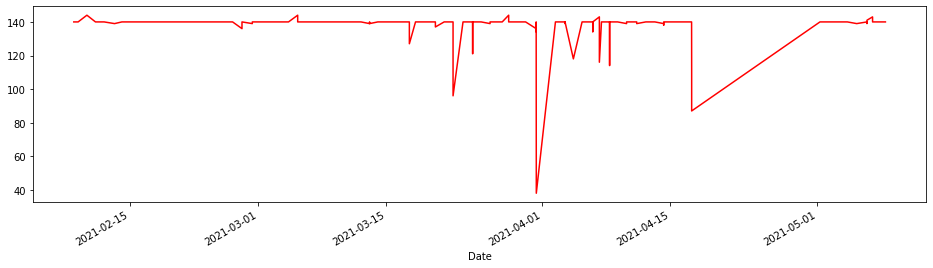

In [ ]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

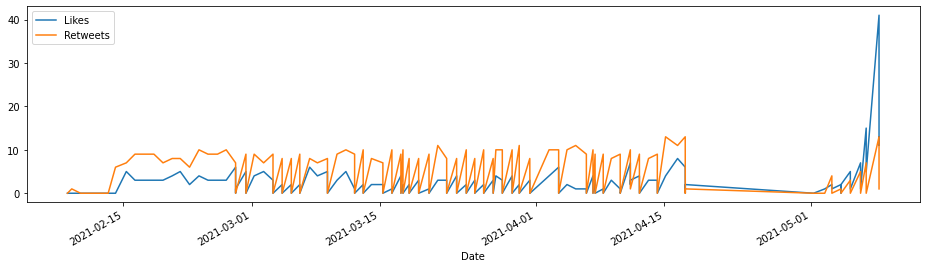

In [ ]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

2.3. Pie charts of sources

In [ ]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter Web App


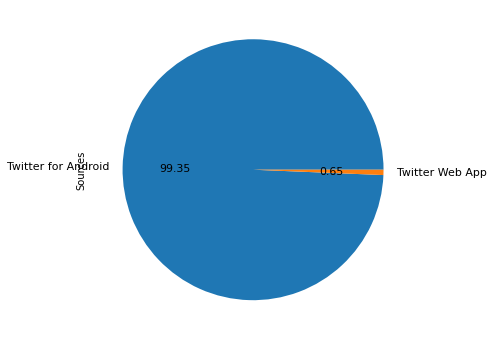

In [ ]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

3. Sentiment analysis

3.1. Importing textblob

In [ ]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(20))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,"Tak hanya menghasilkan sumber energi hijau, Lu...",140,1390983141779640320,2021-05-08 10:53:18,Twitter for Android,13,1,0
1,Pak Luhut mengatakan kawasan industri itu akan...,140,1390982860673216512,2021-05-08 10:52:11,Twitter for Android,11,1,0
2,Menko Marves Luhut Pandjaitan menginformasikan...,140,1390982699825852419,2021-05-08 10:51:33,Twitter for Android,41,13,0
3,Target pembangunan bendungan ini dapat rampung...,140,1390475619973009411,2021-05-07 01:16:36,Twitter for Android,5,0,0
4,Pembangunan kedua bendungan itu dinilai pentin...,140,1390475200848822273,2021-05-07 01:14:56,Twitter for Android,6,0,0
5,Menko Marves Luhut Pandjaitan meninjau langsun...,143,1390475062134808581,2021-05-07 01:14:23,Twitter for Android,15,7,0
6,Dengan peran substansial kyai dalam proses ber...,141,1390252969518526466,2021-05-06 10:31:52,Twitter for Android,1,0,0
7,"""Saya merasa berdosa sekali karena sudah berka...",139,1390252859329941504,2021-05-06 10:31:25,Twitter for Android,4,0,0
8,Menko Marves Luhut Pandjaitan melakukan kunjun...,140,1390252574859689993,2021-05-06 10:30:18,Twitter for Android,7,5,0
9,"Menko Luhut berharap, semua pihak dapat mengej...",139,1389848531909808128,2021-05-05 07:44:46,Twitter for Android,1,0,0


3.2. Analyzing the results

In [ ]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [ ]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 0.6535947712418301%
Percentage of neutral tweets: 99.34640522875817%
Percentage de negative tweets: 0.0%
